In [1]:
# Import essential libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import itertools
import keras
import seaborn as sns
from glob import glob
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers.normalization import BatchNormalization

# For Resnet
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.applications import ResNet50
from keras import regularizers

# For snapshot Ensemble
from keras.callbacks import Callback
from keras import backend
from keras.models import load_model

In [2]:
lymphoblasts_directory = os.path.join('..', 'input/')

# creating a directory for all images present with us and bringing them under same directory
image_directory = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(lymphoblasts_directory, '*', '*.tif'))}
image_directory

{'Im119_1': '../input/not healthy/Im119_1.tif',
 'Im124_1': '../input/not healthy/Im124_1.tif',
 'Im086_1': '../input/not healthy/Im086_1.tif',
 'Im097_1': '../input/not healthy/Im097_1.tif',
 'Im026_1': '../input/not healthy/Im026_1.tif',
 'Im115_1': '../input/not healthy/Im115_1.tif',
 'Im085_1': '../input/not healthy/Im085_1.tif',
 'Im107_1': '../input/not healthy/Im107_1.tif',
 'Im032_1': '../input/not healthy/Im032_1.tif',
 'Im025_1': '../input/not healthy/Im025_1.tif',
 'Im084_1': '../input/not healthy/Im084_1.tif',
 'Im029_1': '../input/not healthy/Im029_1.tif',
 'Im016_1': '../input/not healthy/Im016_1.tif',
 'Im126_1': '../input/not healthy/Im126_1.tif',
 'Im031_1': '../input/not healthy/Im031_1.tif',
 'Im057_1': '../input/not healthy/Im057_1.tif',
 'Im079_1': '../input/not healthy/Im079_1.tif',
 'Im096_1': '../input/not healthy/Im096_1.tif',
 'Im061_1': '../input/not healthy/Im061_1.tif',
 'Im076_1': '../input/not healthy/Im076_1.tif',
 'Im112_1': '../input/not healthy/Im112_

In [3]:
healthyPaths = []
for dirname, _, filenames in os.walk(os.path.join(lymphoblasts_directory, 'healthy')):
    for filename in filenames:
        print(filename)
        if (filename[-3:] == 'tif'):
            healthyPaths.append(os.path.join(dirname, filename))
healthyPaths

Im223_0.tif
Im168_0.tif
Im144_0.tif
Im166_0.tif
Im188_0.tif
Im208_0.tif
Im151_0.tif
Im215_0.tif
Im213_0.tif
Im177_0.tif
Im243_0.tif
Im179_0.tif
Im173_0.tif
Im150_0.tif
Im219_0.tif
Im160_0.tif
Im190_0.tif
Im244_0.tif
Im214_0.tif
Im178_0.tif
Im196_0.tif
Im182_0.tif
Im228_0.tif
Im164_0.tif
Im162_0.tif
Im257_0.tif
Im140_0.tif
Im149_0.tif
Im202_0.tif
Im191_0.tif
Im248_0.tif
Im161_0.tif
Im258_0.tif
Im259_0.tif
Im245_0.tif
Im197_0.tif
Im239_0.tif
Im231_0.tif
Im209_0.tif
Im131_0.tif
Im232_0.tif
Im132_0.tif
Im207_0.tif
Im255_0.tif
Im170_0.tif
Im227_0.tif
Im163_0.tif
Im181_0.tif
Im138_0.tif
Im234_0.tif
Im139_0.tif
Im238_0.tif
Im185_0.tif
Im200_0.tif
Im175_0.tif
Im167_0.tif
Im155_0.tif
Im165_0.tif
Im137_0.tif
Im189_0.tif
Im204_0.tif
Im174_0.tif
Im158_0.tif
Im218_0.tif
Im187_0.tif
Im183_0.tif
Im251_0.tif
Im152_0.tif
Im211_0.tif
Im133_0.tif
Im212_0.tif
Im169_0.tif
Im252_0.tif
Im192_0.tif
Im233_0.tif
Im156_0.tif
Im201_0.tif
Im237_0.tif
Im146_0.tif
Im236_0.tif
Im135_0.tif
Im153_0.tif
Im180_0.tif
Im19

['../input/healthy/Im223_0.tif',
 '../input/healthy/Im168_0.tif',
 '../input/healthy/Im144_0.tif',
 '../input/healthy/Im166_0.tif',
 '../input/healthy/Im188_0.tif',
 '../input/healthy/Im208_0.tif',
 '../input/healthy/Im151_0.tif',
 '../input/healthy/Im215_0.tif',
 '../input/healthy/Im213_0.tif',
 '../input/healthy/Im177_0.tif',
 '../input/healthy/Im243_0.tif',
 '../input/healthy/Im179_0.tif',
 '../input/healthy/Im173_0.tif',
 '../input/healthy/Im150_0.tif',
 '../input/healthy/Im219_0.tif',
 '../input/healthy/Im160_0.tif',
 '../input/healthy/Im190_0.tif',
 '../input/healthy/Im244_0.tif',
 '../input/healthy/Im214_0.tif',
 '../input/healthy/Im178_0.tif',
 '../input/healthy/Im196_0.tif',
 '../input/healthy/Im182_0.tif',
 '../input/healthy/Im228_0.tif',
 '../input/healthy/Im164_0.tif',
 '../input/healthy/Im162_0.tif',
 '../input/healthy/Im257_0.tif',
 '../input/healthy/Im140_0.tif',
 '../input/healthy/Im149_0.tif',
 '../input/healthy/Im202_0.tif',
 '../input/healthy/Im191_0.tif',
 '../input

In [4]:
nothealthyPaths = []
for dirname, _, filenames in os.walk(os.path.join(lymphoblasts_directory, 'not healthy')):
    for filename in filenames:
        if (filename[-3:] == 'tif'):
            nothealthyPaths.append(os.path.join(dirname, filename))
nothealthyPaths

['../input/not healthy/Im119_1.tif',
 '../input/not healthy/Im124_1.tif',
 '../input/not healthy/Im086_1.tif',
 '../input/not healthy/Im097_1.tif',
 '../input/not healthy/Im026_1.tif',
 '../input/not healthy/Im115_1.tif',
 '../input/not healthy/Im085_1.tif',
 '../input/not healthy/Im107_1.tif',
 '../input/not healthy/Im032_1.tif',
 '../input/not healthy/Im025_1.tif',
 '../input/not healthy/Im084_1.tif',
 '../input/not healthy/Im029_1.tif',
 '../input/not healthy/Im016_1.tif',
 '../input/not healthy/Im126_1.tif',
 '../input/not healthy/Im031_1.tif',
 '../input/not healthy/Im057_1.tif',
 '../input/not healthy/Im079_1.tif',
 '../input/not healthy/Im096_1.tif',
 '../input/not healthy/Im061_1.tif',
 '../input/not healthy/Im076_1.tif',
 '../input/not healthy/Im112_1.tif',
 '../input/not healthy/Im039_1.tif',
 '../input/not healthy/Im064_1.tif',
 '../input/not healthy/Im098_1.tif',
 '../input/not healthy/Im005_1.tif',
 '../input/not healthy/Im022_1.tif',
 '../input/not healthy/Im037_1.tif',
 

In [5]:
df = pd.DataFrame(columns = ['path', 'label'])

In [6]:
# labels for healthy:0, not healthy:1

for index1 in healthyPaths:
    df=df.append({'path' : str(index1) , 'label' : 0} , ignore_index=True)
for index2 in nothealthyPaths:
    df=df.append({'path' : str(index2) , 'label' : 1} , ignore_index=True)

In [7]:
df.head()

,path,label
0,../input/healthy/Im223_0.tif,0
1,../input/healthy/Im168_0.tif,0
2,../input/healthy/Im144_0.tif,0
3,../input/healthy/Im166_0.tif,0
4,../input/healthy/Im188_0.tif,0


In [8]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = r
    
    return gray

In [9]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))

In [10]:
for index in range(len(df['image'])):
    img = Image.fromarray(df['image'][index])
    if img.mode == 'RGB':
        df['image'][index] = rgb2gray(df['image'][index])

In [11]:
import cv2

for i in range(len(df['image'])):
    gray = df['image'][i]
    df['image'][i] = cv2.merge([gray,gray,gray])

In [12]:
df.head()

,path,label,image
0,../input/healthy/Im223_0.tif,0,"[[[156, 156, 156], [156, 156, 156], [156, 156,..."
1,../input/healthy/Im168_0.tif,0,"[[[156, 156, 156], [158, 158, 158], [159, 159,..."
2,../input/healthy/Im144_0.tif,0,"[[[169, 169, 169], [167, 167, 167], [165, 165,..."
3,../input/healthy/Im166_0.tif,0,"[[[160, 160, 160], [159, 159, 159], [161, 161,..."
4,../input/healthy/Im188_0.tif,0,"[[[177, 177, 177], [177, 177, 177], [175, 175,..."


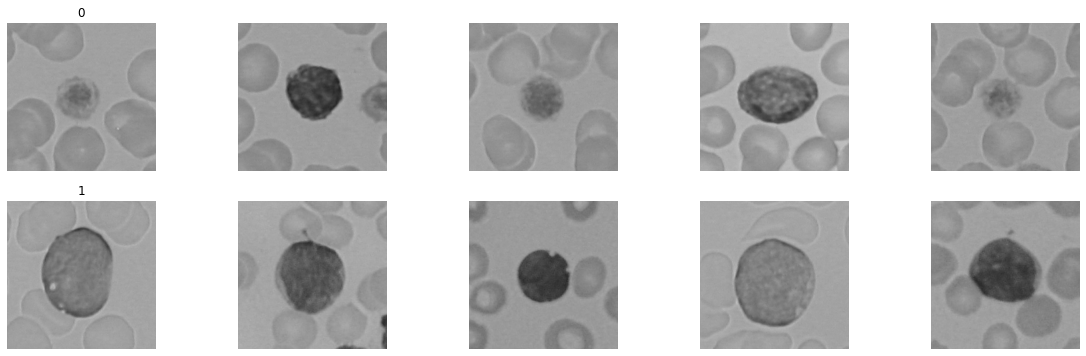

In [13]:
# Printing Sample images for each  type
n_samples = 5
num_classes = 2
fig, m_axs = plt.subplots(num_classes, n_samples, figsize = (4*n_samples, 3*num_classes))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['label']).groupby('label')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [14]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [15]:
df['image'].map(lambda x: x.shape).value_counts()

(224, 224, 3)    260
Name: image, dtype: int64

In [16]:
# Print no. of instances of each class present to balace the data
df['label'].value_counts()

1    130
0    130
Name: label, dtype: int64

In [17]:
# Copy fewer class to balance the number of 7 classes
data_aug_rate = [11,11] # These values are calculated to balance the data
for i in range(num_classes):
    if data_aug_rate[i]:
        df=df.append([df.loc[df['label'] == i,:]]*(data_aug_rate[i]-1), ignore_index=True)
df['label'].value_counts()

1    1430
0    1430
Name: label, dtype: int64

In [18]:
features=df.drop(columns=['label'],axis=1)
target=df['label']

In [19]:
x_train = np.asarray(df['image'].tolist())
x_test = np.asarray(test_df['image'].tolist())

In [20]:
# Normalizing the data
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [21]:
y_train = to_categorical(df['label'], num_classes = num_classes)
y_test = to_categorical(test_df['label'], num_classes = num_classes)

In [22]:
# Splitting training data and validation data
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.20, random_state = 3)

In [23]:
x_train = x_train.reshape(x_train.shape[0], *(224, 224, 3))
x_test = x_test.reshape(x_test.shape[0], *(224, 224, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(224, 224, 3))

In [24]:
x_train.shape

(2288, 224, 224, 3)

In [25]:
x_test.shape

(52, 224, 224, 3)

In [26]:
x_validate.shape

(572, 224, 224, 3)

In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations. Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [27]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

For the data augmentation, i choosed to :

1-Randomly rotate some training images by 30 degrees

2-Randomly Zoom by 20% some training images

3-Randomly shift images horizontally by 10% of the width

4-Randomly shift images vertically by 10% of the height

5-Randomly flip images horizontally. Once our model is ready, we fit the training dataset.

In [28]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
import keras
#import keras.metrics
from keras.models import Sequential,Input,Model
input_tensor = Input(shape=(224,224,3))
base_model = ResNet50(input_tensor = input_tensor, include_top = False, pooling = 'average')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [29]:
optimizer = Adam(lr = 0.0001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [30]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
x_train.shape

(2288, 224, 224, 3)

In [31]:
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=10),
    steps_per_epoch=len(x_train) / 10,
    epochs=20,
    verbose=1,
    callbacks=[learning_rate_reduction],
    validation_data= datagen.flow(x_validate, y_validate)
)

Epoch 1/20
229/228 [==============================] - 39s 170ms/step - loss: 0.1234 - accuracy: 0.9489 - val_loss: 0.9827 - val_accuracy: 0.4196 - lr: 1.0000e-04
Epoch 2/20
229/228 [==============================] - 38s 167ms/step - loss: 0.0581 - accuracy: 0.9873 - val_loss: 1.8720 - val_accuracy: 0.4948 - lr: 1.0000e-04
Epoch 3/20
229/228 [==============================] - 38s 164ms/step - loss: 0.0485 - accuracy: 0.9843 - val_loss: 1.9706 - val_accuracy: 0.5664 - lr: 1.0000e-04
Epoch 4/20
229/228 [==============================] - 37s 164ms/step - loss: 0.0160 - accuracy: 0.9939 - val_loss: 0.0772 - val_accuracy: 0.9808 - lr: 1.0000e-04
Epoch 5/20
229/228 [==============================] - 38s 166ms/step - loss: 0.0367 - accuracy: 0.9869 - val_loss: 0.0669 - val_accuracy: 0.9790 - lr: 1.0000e-04
Epoch 6/20
229/228 [==============================] - 37s 161ms/step - loss: 0.0087 - accuracy: 0.9983 - val_loss: 2.5923e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/20
229/228 [====

In [32]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

2/2 [==============================] - 0s 108ms/step - loss: 2.2447e-04 - accuracy: 1.0000
Loss of the model is -  0.00022447215451393276
2/2 [==============================] - 0s 22ms/step - loss: 2.2447e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


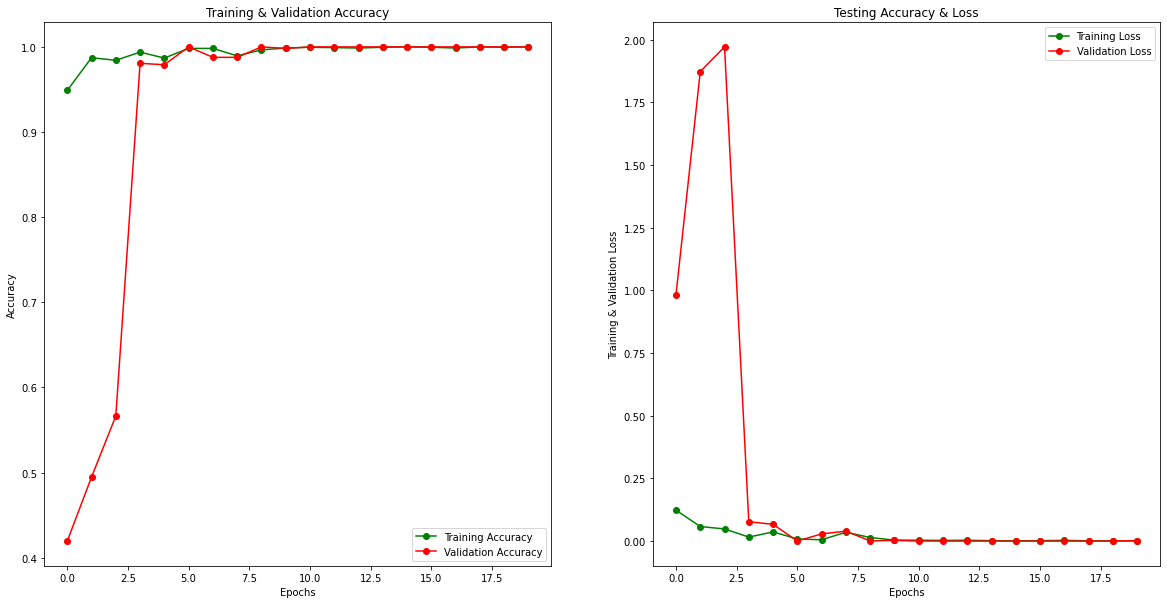

In [33]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [34]:
from sklearn.metrics import classification_report
pred = model.predict(x_validate)
print(classification_report(np.argmax(y_validate, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      1.00      1.00       289

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



In [35]:
cm = confusion_matrix(np.argmax(y_validate, axis = 1),np.argmax(pred, axis = 1))
cm

array([[283,   0],
       [  0, 289]])

In [36]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])


In [ ]:
import seaborn as sn
array =[[283,0],
        [0,289]]
df_cm = pd.DataFrame(array, index = [i for i in ["healthy", "not healthy"]],
                  columns = [i for i in ["healthy", "not healthy"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)